In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

In [2]:
# extract ratings dataset
ratings = pd.read_csv('ml-32m/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [3]:
# ratings dataset info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [4]:
# The number of users
ratings['userId'].nunique()

200948

In [5]:
# The user that gave most ratings
ratings['userId'].value_counts().head()

userId
175325    33332
17035      9577
55653      9178
123465     9044
171795     9016
Name: count, dtype: int64

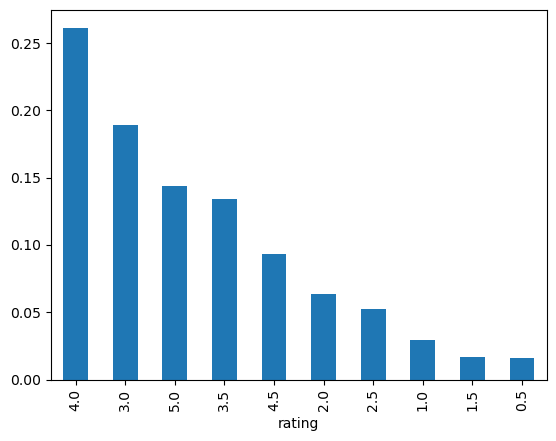

In [6]:
# Visualize the rating
ratings['rating'].value_counts(normalize=True).plot(kind='bar');

In [7]:
# extract movies dataset
movies = pd.read_csv('ml-32m/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# Merge ratings and movies data
merged_df = pd.merge(ratings, movies, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,3,17,5.0,1084485217,Sense and Sensibility (1995),Drama|Romance
2,15,17,4.5,1289858271,Sense and Sensibility (1995),Drama|Romance
3,28,17,4.0,961513829,Sense and Sensibility (1995),Drama|Romance
4,29,17,4.0,845056111,Sense and Sensibility (1995),Drama|Romance


In [9]:
# Checking for null values
merged_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [10]:
# Feature Engineering: Calculate average rating per movie
avg_ratings = merged_df.groupby('movieId')['rating'].mean().reset_index()
avg_ratings.rename(columns={'rating': 'avg_rating'}, inplace=True)
avg_ratings.head()

,movieId,avg_rating
0,1,3.897438
1,2,3.275758
2,3,3.139447
3,4,2.845331
4,5,3.059602


In [11]:
# Feature Engineering: Count of ratings per movie
rating_counts = merged_df.groupby('movieId')['rating'].count().reset_index()
rating_counts.rename(columns={'rating': 'rating_count'}, inplace=True)
rating_counts.head()

,movieId,rating_count
0,1,68997
1,2,28904
2,3,13134
3,4,2806
4,5,13154


In [12]:
# Merge average ratings and rating counts back into the main dataframe
final_df = pd.merge(merged_df, avg_ratings, on='movieId')
final_df = pd.merge(final_df, rating_counts, on='movieId')
final_df.head()

,userId,movieId,rating,timestamp,title,genres,avg_rating,rating_count
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance,3.945126,22251
1,3,17,5.0,1084485217,Sense and Sensibility (1995),Drama|Romance,3.945126,22251
2,15,17,4.5,1289858271,Sense and Sensibility (1995),Drama|Romance,3.945126,22251
3,28,17,4.0,961513829,Sense and Sensibility (1995),Drama|Romance,3.945126,22251
4,29,17,4.0,845056111,Sense and Sensibility (1995),Drama|Romance,3.945126,22251


In [ ]:
# Load data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(final_df[['userId', 'movieId', 'rating']], reader)

In [ ]:
# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
# Train a collaborative filtering model
model = KNNBasic(sim_options={'user_based': True})
model.fit(trainset)

In [ ]:
# Make predictions
predictions = model.test(testset)

In [ ]:
# Predict rating for user 1 and movie 10
predicted_rating = model.predict(uid=1, iid=10)
print(f"Predicted rating for user 1 and movie 10: {predicted_rating.est}")

In [ ]:
# Plot top-rated movies
top_movies = final_df.groupby('title')['avg_rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_movies.values, y=top_movies.index)
plt.title('Top 10 Movies by Average Rating')
plt.show()